# Imports

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Dados

In [3]:
df = pd.read_csv("datasets/diabetes.csv")
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Dividindo os dados em X e y
X = df.drop('outcome', axis=1)
y = df['outcome']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Modelo

In [9]:
# Instanciando o modelo
modelo = RandomForestClassifier(n_estimators=5,
                                max_features=None,
                                max_depth=5,
                                min_samples_split=2, 
                                random_state=0)
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=5,
                       random_state=0)

In [10]:
# Predição 
y_pred = modelo.predict(X_test)

# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
print('Acurácia: ', acuracia)

Acurácia:  0.75


# Visualização dos resultados

Vamos exportar as três primeiras árvores:

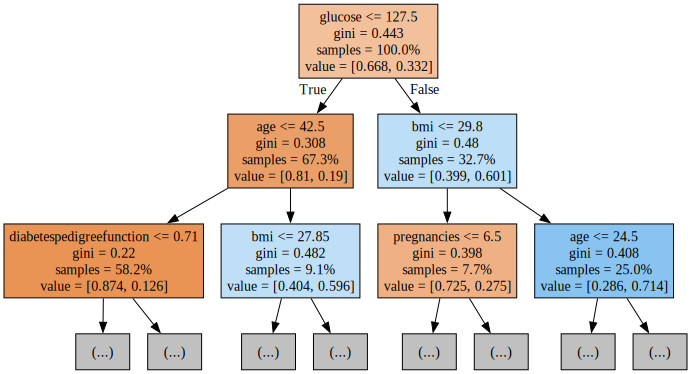

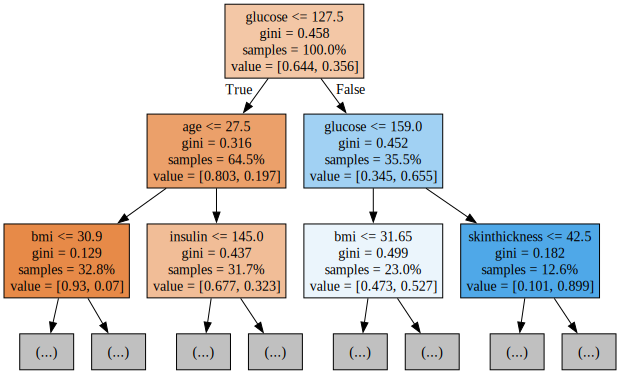

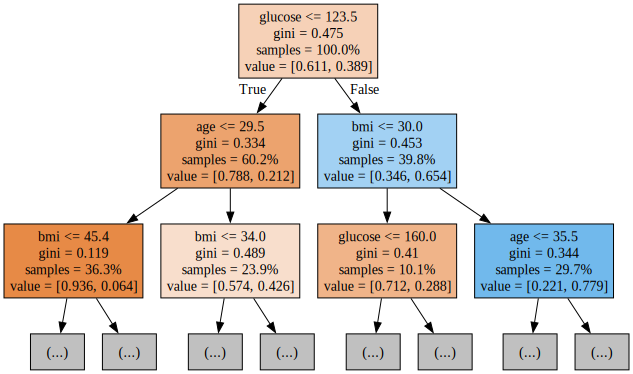

In [11]:
for i in range(3):
    tree = modelo.estimators_[i]
    dot_data = export_graphviz(tree, 
                              feature_names=X_train.columns,
                              filled=True,
                              max_depth=2, 
                              impurity=True,
                              proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Exercício

> **1.** Variar os hiperparâmetros e checar se houve melhora na acurácia. 

> **2.** Imprimir também as outras métricas: precisão e recall (sensibilidade)

> **3.** Treinar um modelo de Random Forest para a base de dados de cancêr de mama. 